In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
gameDf.dtypes

application_key      int64
mvar1              float64
mvar2              float64
mvar3              float64
mvar4              float64
mvar5              float64
mvar6              float64
mvar7              float64
mvar8              float64
mvar9              float64
mvar10             float64
mvar11             float64
mvar12             float64
mvar13             float64
mvar14               int64
mvar15             float64
mvar16             float64
mvar17             float64
mvar18             float64
mvar19             float64
mvar20             float64
mvar21             float64
mvar22             float64
mvar23             float64
mvar24             float64
mvar25             float64
mvar26             float64
mvar27             float64
mvar28             float64
mvar29             float64
mvar30             float64
mvar31             float64
mvar32             float64
mvar33             float64
mvar34             float64
mvar35             float64
mvar36             float64
m

In [5]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [6]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [7]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

In [8]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [9]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [10]:
gameX["mvar47"][0]

'C'

In [11]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

# gameX.loc[gameX.loc[:, "mvar47"]=='C', "mvar47"] = 0
# gameX.loc[gameX.loc[:, "mvar47"]=='L', "mvar47"] = 1

In [12]:
gameX["mvar47"].dtype

dtype('uint8')

In [13]:
gameX

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1696.0,1.6541,0.000,0.000,0.000,0.0,6015.0,322.0,40369.0,18414.0,...,4.0,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,1
1,1846.0,0.8095,0.000,0.000,0.000,102.0,7532.0,3171.0,18234.0,13664.0,...,2.0,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,0
2,1745.0,0.4001,0.000,0.000,0.000,NaN,2536.0,NaN,NaN,2536.0,...,1.0,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,1
3,1739.0,0.2193,0.000,0.000,0.000,1982.0,26440.0,4955.0,20316.0,37013.0,...,2.0,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,0
4,1787.0,0.0118,0.225,0.000,0.000,5451.0,5494.0,5494.0,7987.0,4696.0,...,2.0,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,0
5,1579.0,NaN,3.502,0.000,0.000,NaN,NaN,NaN,NaN,0.0,...,2.0,NaN,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,1
6,1818.0,0.4001,0.000,0.000,0.000,NaN,1088.0,NaN,1536.0,1498.0,...,0.0,0.0,88.171,NaN,0.00000,2.0,0.87224,NaN,0.0,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,1836.0,0.1358,0.000,0.000,0.000,347.0,38964.0,17828.0,70729.0,65843.0,...,2.0,0.0,NaN,NaN,0.00000,10.0,0.89868,0.0,0.0,0
9,1839.0,0.1981,0.000,0.000,0.000,793.0,6131.0,6045.0,48959.0,31640.0,...,0.0,0.0,NaN,45.590,0.08824,14.0,0.33834,NaN,0.0,0


In [14]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1696.000000,1.654100,0.000000,0.000000,0.00000,0.000000,6015.000000,322.00000,40369.000000,18414.000000,...,4.000000,1.000000,73.780000,82.547000,0.086960,10.000000,0.638990,0.070736,0.000000,1
1,1846.000000,0.809500,0.000000,0.000000,0.00000,102.000000,7532.000000,3171.00000,18234.000000,13664.000000,...,2.000000,0.000000,99.129000,72.096758,0.000000,13.000000,0.638360,0.070736,0.096135,0
2,1745.000000,0.400100,0.000000,0.000000,0.00000,1606.702372,2536.000000,6773.68666,34097.436013,2536.000000,...,1.000000,0.000000,98.497452,29.290000,0.000000,1.000000,1.000000,0.070736,0.000000,1
3,1739.000000,0.219300,0.000000,0.000000,0.00000,1982.000000,26440.000000,4955.00000,20316.000000,37013.000000,...,2.000000,0.000000,96.272000,72.096758,0.153850,3.000000,0.532410,0.000000,0.000000,0
4,1787.000000,0.011800,0.225000,0.000000,0.00000,5451.000000,5494.000000,5494.00000,7987.000000,4696.000000,...,2.000000,0.000000,115.019000,72.096758,0.000000,1.000000,0.926650,0.070736,0.096135,0
5,1579.000000,1.105629,3.502000,0.000000,0.00000,1606.702372,17595.807537,6773.68666,34097.436013,0.000000,...,2.000000,0.090819,98.497452,72.096758,1.500000,0.000000,0.705285,0.070736,0.096135,1
6,1818.000000,0.400100,0.000000,0.000000,0.00000,1606.702372,1088.000000,6773.68666,1536.000000,1498.000000,...,0.000000,0.000000,88.171000,72.096758,0.000000,2.000000,0.872240,0.070736,0.000000,1
7,1745.971085,1.105629,5.280955,0.474516,1.12472,1606.702372,17595.807537,6773.68666,34097.436013,30492.367255,...,4.286422,0.090819,98.497452,72.096758,0.335142,6.552777,0.705285,0.070736,0.096135,1
8,1836.000000,0.135800,0.000000,0.000000,0.00000,347.000000,38964.000000,17828.00000,70729.000000,65843.000000,...,2.000000,0.000000,98.497452,72.096758,0.000000,10.000000,0.898680,0.000000,0.000000,0
9,1839.000000,0.198100,0.000000,0.000000,0.00000,793.000000,6131.000000,6045.00000,48959.000000,31640.000000,...,0.000000,0.000000,98.497452,45.590000,0.088240,14.000000,0.338340,0.070736,0.000000,0


In [15]:
#scoring funtion
def scoring(yhat0, y):
    
    y = np.array(y)
    y.sort()
    
    pointsMax = 0
    thresh=0
    
#     print("yhat0 type", type(yhat0))
#     print("yhat0 shape", type(yhat0.shape))
    
#     print("y type", type(y))
#     print("y shape", type(y.shape))
    
    for thresh in np.arange(0.1, 0.9, 0.1):
        points = 0
        budget = 50000
        yhat = np.array(yhat0>thresh, dtype=yhat0.dtype)
        for i in range(len(y)):
            if y[i] == 0:
                if yhat[i] == 0:
                    points+=100
                    budget-=5
                else:
                    budget-=10
            else:
                if yhat[i]==0:
                    points-=50
                    budget-=10
                else:
                    points+=100
                    budget-=10
            if budget<=0:
                break
        if pointsMax<points:
            pointsMax=points
            threshMax = thresh
            
        print(thresh, " ", points)
            
    return pointsMax, threshMax

In [16]:
#KFold Stratified CV
from sklearn import model_selection
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
# from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(gameX,gameY, test_size=0.25, stratify = gameY, random_state=1)


In [21]:
from sklearn.ensemble import RandomForestClassifier
import time

ranMax=RandomForestClassifier(max_features=10,n_estimators=100,random_state=1).fit(xtrain, ytrain)

In [22]:
#train score
t=time.time()
print(scoring(ranMax.predict_proba(xtrain)[:, 1], ytrain))
print(time.time()-t)


0.1   389900
0.2   561800
0.3   605200
0.4   609600
0.5   609600
0.6   613800
0.7   664600
0.8   792400
(792400, 0.80000000000000004)
4.848176956176758


In [23]:
#train score
t=time.time()
print(scoring(ranMax.predict_proba(xtrain)[:, 1], ytrain))
print(time.time()-t)


0.1   389900
0.2   561800
0.3   605200
0.4   609600
0.5   609600
0.6   613800
0.7   664600
0.8   792400
(792400, 0.80000000000000004)
5.140335559844971


In [24]:
#test score
t=time.time()
print(scoring(ranMax.predict_proba(xtest)[:, 1], ytest))
print(time.time()-t)


0.1   209700
0.2   340600
0.3   474800
0.4   601600
0.5   725000
0.6   822800
0.7   906800
0.8   965000
(965000, 0.80000000000000004)
1.779752492904663


In [25]:
#test score
t=time.time()
print(scoring(ranMax.predict_proba(xtest)[:, 1], ytest))
print(time.time()-t)


0.1   209700
0.2   340600
0.3   474800
0.4   601600
0.5   725000
0.6   822800
0.7   906800
0.8   965000
(965000, 0.80000000000000004)
1.6297268867492676


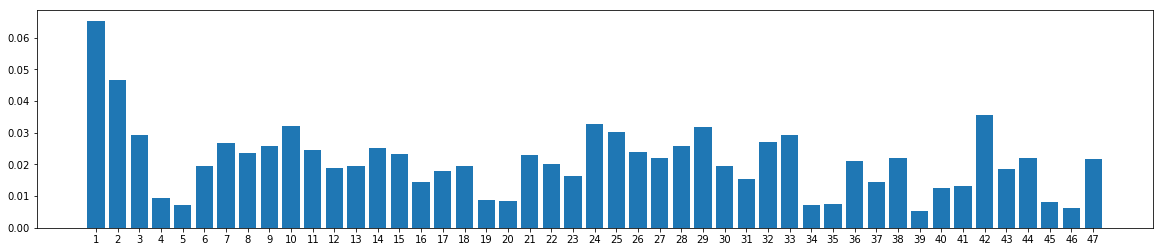

In [78]:
#RF feature imp
plt.figure(figsize=(20,4))
plt.bar(range(1, len(ranMax.feature_importances_)+1), ranMax.feature_importances_)
plt.xticks(range(1, len(ranMax.feature_importances_)+1))
plt.show()

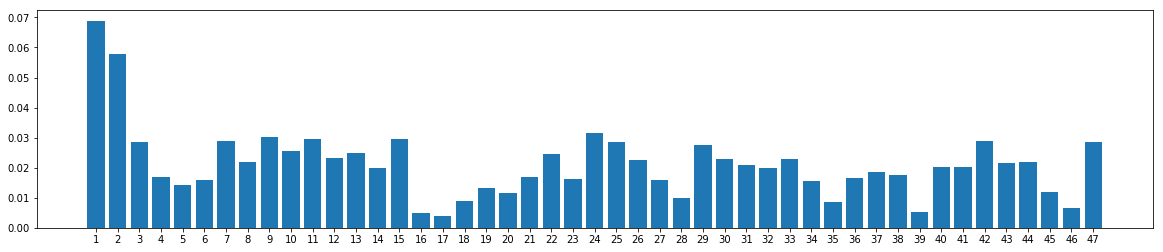

In [84]:
#XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(ranMax.feature_importances_)+1))
plt.show()

In [ ]:
#BREAK OPEN

In [22]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import time

In [41]:
# user define objective function, given prediction, return gradient and second order gradient
# this is log likelihood loss
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess

# user defined evaluation function, return a pair metric_name, result
# NOTE: when you do customized loss function, the default prediction value is margin
# this may make builtin evaluation metric not function properly
# for example, we are doing logistic loss, the prediction is score before logistic transformation
# the builtin evaluation error assumes input is after logistic transformation
# Take this in mind when you use the customization, and maybe you need write customized evaluation function
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result. The metric name must not contain a colon (:) or a space
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'my-error', float(sum(labels != (preds > 0.0))) / len(labels)

In [38]:
def modelfit(alg, dtrainX, dtrainY, predictors, useTrainCV=True, cv_folds=4, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
#         xgb_param['num_class']=2 #Set this if class>2 (if using multi:softprob)
        xgtrain = xgb.DMatrix(dtrainX[predictors].values, label=dtrainY.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds,stratified=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrainX[predictors], dtrainY ,eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrainX[predictors])
    dtrain_predprob = alg.predict_proba(dtrainX[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrainY.values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')



In [44]:
#Choose all predictors except target & IDcols
t=time.time()
predictors = [x for x in gameX.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4, #4
 min_child_weight=1,
 gamma=0,
reg_alpha = 0.05,
 subsample=0.8,
 colsample_bytree=0.8,
#Use multi:softprob for multi class(set the num_class param in above modelfit)
#  objective= 'binary:logistic',
 objective = logregobj,
 nthread=4,
 scale_pos_weight=1,
 missing = -9999,
 seed=27)

modelfit(xgb1, gameX, gameY, predictors)

print('time',time.time()-t)

XGBoostError: b'[01:11:51] src/objective/objective.cc:21: Unknown objective function <function logregobj at 0x7fafc7187268>'

In [34]:
xgb1

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=-9999, n_estimators=206, nthread=4,
       objective='binary:logistic', reg_alpha=0.05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [26]:
xgb1

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=206, nthread=4,
       objective='binary:logistic', reg_alpha=0.05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [61]:
from xgboost import plot_importance

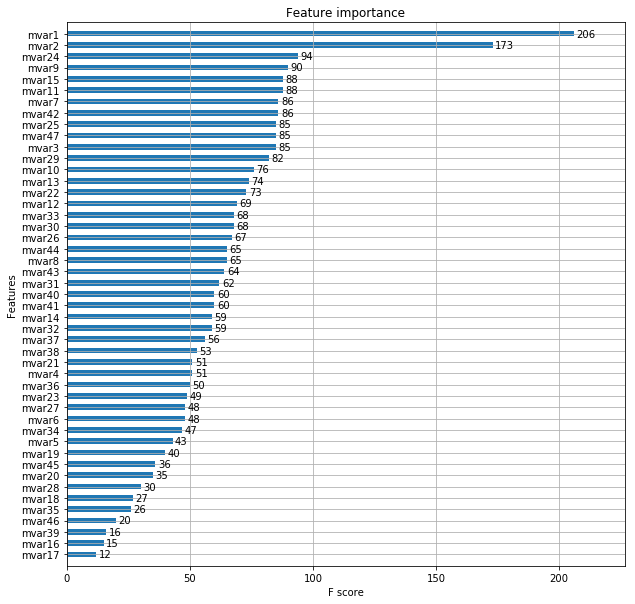

In [93]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(xgb1, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

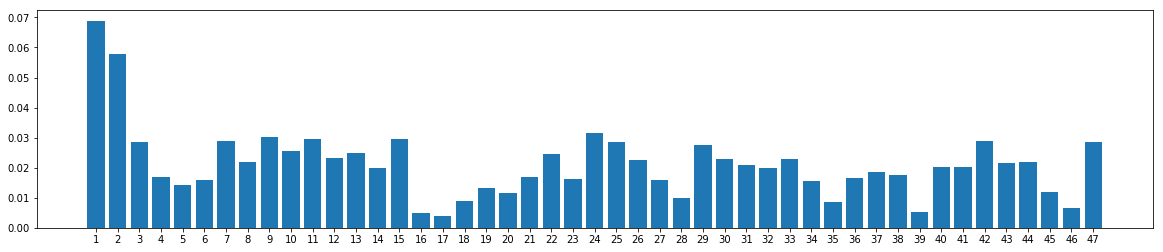

In [85]:
#XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(ranMax.feature_importances_)+1))
plt.show()

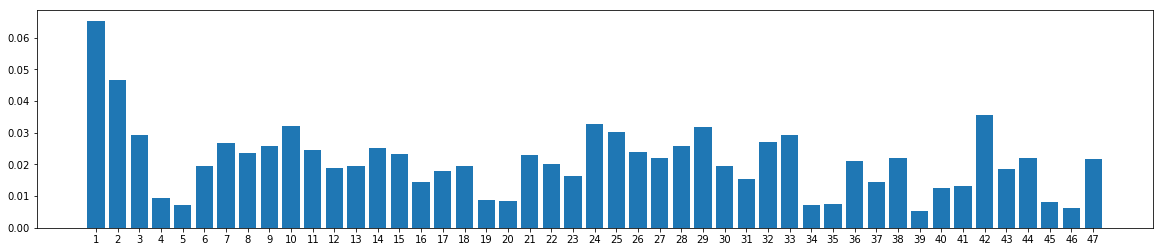

In [78]:
#RF feature imp
plt.figure(figsize=(20,4))
plt.bar(range(1, len(ranMax.feature_importances_)+1), ranMax.feature_importances_)
plt.xticks(range(1, len(ranMax.feature_importances_)+1))
plt.show()

In [475]:
# Best model
# Model Report
# Accuracy : 0.8216
# time 74.26037430763245


In [476]:
xgb1.predict_proba(gameX)

array([[ 0.67619884,  0.32380119],
       [ 0.93077403,  0.06922599],
       [ 0.75445408,  0.24554592],
       ..., 
       [ 0.23856366,  0.76143634],
       [ 0.86770111,  0.1322989 ],
       [ 0.594414  ,  0.40558597]], dtype=float32)

In [477]:
# #best model
# xgb1.predict_proba(gameX)

In [478]:
#BREAK CLOSE

In [39]:
ranMax=RandomForestClassifier(max_features=5,n_estimators=1000,random_state=1).fit(gameX, gameY)

In [40]:
# clf = xgb1
clf = ranMax

leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



leaderAppID = leaderDf['application_key']
del leaderDf['application_key']



leaderX = leaderDf.copy()

In [41]:
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [42]:
leaderX.fillna(gameX.mean(),inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,1.0,0.000000,98.497452,20.551000,0.42105,3.0,0.856610,0.070736,0.000000,0
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,3.0,0.000000,98.497452,63.047000,0.00000,15.0,0.943910,0.000000,0.000000,1
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,1.0,0.000000,98.497452,83.797000,0.33333,3.0,0.764670,0.000000,0.000000,1
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.0,0.090819,98.497452,72.096758,1.50000,0.0,0.705285,0.070736,0.096135,1
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,3.0,0.000000,96.052000,66.665000,0.00000,23.0,0.791900,0.000000,0.000000,0
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,4.0,0.000000,98.497452,77.780000,0.00000,21.0,0.924620,0.000000,0.000000,0
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,6.0,0.000000,98.497452,67.159000,0.00000,14.0,0.713470,0.000000,0.000000,0
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,9.0,0.000000,98.497452,72.096758,0.00000,15.0,0.924030,0.000000,0.000000,0
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,1.0,0.000000,98.497452,72.096758,0.00000,5.0,0.897600,0.000000,0.096135,0
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,9.0,0.000000,98.497452,72.096758,0.05882,14.0,0.405290,0.070736,0.000000,1


In [43]:
#Sagar Leaderboard
pred = clf.predict_proba(leaderX)

In [44]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 3)

In [45]:
pred

,0,1,application_key
0,0.883,0.117,350053
1,0.980,0.020,350054
2,0.908,0.092,350055
3,0.320,0.680,350056
4,0.840,0.160,350057
5,0.958,0.042,350058
6,0.920,0.080,350059
7,1.000,0.000,350060
8,0.998,0.002,350061
9,0.748,0.252,350062


In [46]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = False)

In [47]:
pred

,0,1,application_key
7,1.000,0.000,350060
25,1.000,0.000,350078
47,1.000,0.000,350100
49,1.000,0.000,350102
60,1.000,0.000,350113
74,1.000,0.000,350127
88,1.000,0.000,350141
134,1.000,0.000,350187
193,1.000,0.000,350246
656,1.000,0.000,350709


In [48]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [49]:
pred = pred.loc[:,'application_key':]

In [50]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [51]:
submit.to_csv('flabbergasted_IITGuwahati_110.csv',header = False, index = False)

In [404]:
import pickle
filename = 'm-xgb-910250.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [20]:
ranMax=RandomForestClassifier(max_features=10,n_estimators=200,random_state=1).fit(gameX, gameY)

In [74]:
#Leaderboard
clf = ranMax

leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



leaderAppID = leaderDf['application_key']
del leaderDf['application_key']



leaderX = leaderDf

In [75]:
#one hot encoding C=0 L=1
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [76]:
#Missing values median
leaderX.fillna(gameX.mean(),inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,1.0,0.000000,98.497452,20.551000,0.42105,3.0,0.856610,0.070736,0.000000,0
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,3.0,0.000000,98.497452,63.047000,0.00000,15.0,0.943910,0.000000,0.000000,1
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,1.0,0.000000,98.497452,83.797000,0.33333,3.0,0.764670,0.000000,0.000000,1
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.0,0.090819,98.497452,72.096758,1.50000,0.0,0.705285,0.070736,0.096135,1
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,3.0,0.000000,96.052000,66.665000,0.00000,23.0,0.791900,0.000000,0.000000,0
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,4.0,0.000000,98.497452,77.780000,0.00000,21.0,0.924620,0.000000,0.000000,0
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,6.0,0.000000,98.497452,67.159000,0.00000,14.0,0.713470,0.000000,0.000000,0
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,9.0,0.000000,98.497452,72.096758,0.00000,15.0,0.924030,0.000000,0.000000,0
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,1.0,0.000000,98.497452,72.096758,0.00000,5.0,0.897600,0.000000,0.096135,0
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,9.0,0.000000,98.497452,72.096758,0.05882,14.0,0.405290,0.070736,0.000000,1


In [77]:
pred = clf.predict_proba(leaderX)[:, 1]
# pred.sort()
# pred = pd.DataFrame(pred)
# pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True)

pred = pd.DataFrame({'0':leaderAppID,  '1': pred })


# pred['application_key'] = leaderAppID
# pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True)

In [78]:
pred

,0,1
0,350053,0.12
1,350054,0.00
2,350055,0.13
3,350056,0.68
4,350057,0.11
5,350058,0.04
6,350059,0.07
7,350060,0.00
8,350061,0.00
9,350062,0.23


In [79]:
pred = pred.sort_values('1')
pred

,0,1
24999,375052,0.00
2551,352604,0.00
15133,365186,0.00
15130,365183,0.00
2560,352613,0.00
2568,352621,0.00
2572,352625,0.00
15096,365149,0.00
15144,365197,0.00
2580,352633,0.00


In [80]:
thresh = 0.5
print("THRESHOLD:", thresh)
pred = np.array(pred)
pred[pred[:, 1]>thresh, 1] = 1
pred[pred[:, 1]<=thresh, 1] = 0

THRESHOLD: 0.5


In [81]:
submit = pd.DataFrame(pred)

In [82]:
submit = submit.astype('int64')

In [83]:
submit

,0,1
0,375052,0
1,352604,0
2,365186,0
3,365183,0
4,352613,0
5,352621,0
6,352625,0
7,365149,0
8,365197,0
9,352633,0


In [84]:
submit.to_csv('flabbergasted_IITGuwahati_61.csv',header = False, index = False)